In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv(r"C:\Users\Acer\Downloads\ibm-hr-analytics-employee-attrition-performance\WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [3]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
print('No of Rows:',df.shape[0])
print('No of Columns:',df.shape[1])

No of Rows: 1470
No of Columns: 35


In [5]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [7]:
# As we have 35 Columns Lets sort Columns by their datatype
df.columns.to_series().groupby(df.dtypes).groups

{int64: ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager'], object: ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']}

## Comment -

1. In this HR dataset we have 1470 rows and 35 columns.

2. Non-null count is same for all Columns, so it seem that it contain No missing value. Still we need to perform Data integrity Check for null values in form of "-","NA" , any duplicate entry or error in Data.

3. Out of 35 we have 9 features with Object datatypes and rest are int64 types

4. Among all Numeric Variables 'Education','EnvironmentSatisfaction', 'JobInvolvement', 'JobSatisfaction', 'RelationshipSatisfaction', 'PerformanceRating', 'WorkLifeBalance' are ordinal variable. Unique range of all these ordinal Variable need to check.

5. Here We have Target Variable 'Attrition'.



### These Ordinal features come with the following label encoding:

  i) Education: 1- 'Below College' , 2 -'College', 3 -'Bachelor', 4- 'Master' ,5 -'Doctor'

  ii) EnvironmentSatisfaction: 1- 'Low', 2- 'Medium', 3 -'High', 4- 'Very High'

  iii) JobInvolvement: 1 -'Low', 2- 'Medium', 3- 'High', 4- 'Very High'

  iv) JobSatisfaction: 1- 'Low', 2- 'Medium', 3- 'High', 4 -'Very High'

  v) PerformanceRating: 1- 'Low', 2- 'Average', 3 -'Good', 4- 'Excellent', 5- 'Outstanding'

  vi) RelationshipSatisfaction: 1- 'Low', 2- 'Medium', 3- 'High', 4- 'Very High'

  vii) WorkLifeBalance: 1- 'Bad', 2- 'Good', 3- 'Better', 4- 'Best'

## Statistical Analysis

Before Going for Statistical exploration of data, first check integrity of data & Missing value

### Data Integrity Check

Since dataset is large, Let check for any entry which is repeated or duplicated in dataset.

In [8]:
df.duplicated().sum()

0

### Missing value check

In [9]:
df.isnull().sum().sort_values(ascending = False)

Age                         0
StandardHours               0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
MonthlyIncome               0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
MonthlyRate                 0
MaritalStatus               0
Attrition                   0
EmployeeCount               0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeNumber              0
JobSatisfaction             0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole   

Comment - Dataset does not contain Any duplicate entry, Missing Values.

## Extracting Categorical columns

In [10]:
cat = (df.dtypes == 'object')
print("Categorical variables:",len(list(cat[cat].index)))

Categorical variables: 9


In [11]:
categorical_columns = df.select_dtypes(include=['object']).columns

# Displaying the result
print("Categorical Columns:",categorical_columns)

Categorical Columns: Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')


## Encoding Categorical values to Numeric values

In [12]:
#count of  categorical value
print(df['Attrition'].value_counts())

Attrition
No     1233
Yes     237
Name: count, dtype: int64


In [13]:
# encoding attrition columns.
df= df.replace({"Attrition":{"No":0, "Yes":1 }})

In [14]:
#count of  categorical value
print(df['BusinessTravel'].value_counts())

BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64


In [15]:
# encoding Bussiness Travel columns.
df= df.replace({"BusinessTravel":{"Non-Travel":1, "Travel_Frequently":2,"Travel_Rarely":3 }})

In [16]:
# count of categorical value.
print(df['Department'].value_counts())

Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64


In [17]:
# encoding Department column.
df= df.replace({"Department":{"Human Resources":1, "Research & Development":2, "Sales":3 }})

In [18]:
# encoding Educationfield columns.
print(df['EducationField'].value_counts())

EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: count, dtype: int64


In [19]:
#encoding EducationFiield columns.
df= df.replace({"EducationField":{"Human Resources":1, "Life Sciences":2, 
                                  "Marketing":3, "Medical":4,
                                  "Other":5, "Technical Degree":6 }})

In [20]:
# value count of gender column
print(df['Gender'].value_counts())

Gender
Male      882
Female    588
Name: count, dtype: int64


In [48]:
df=df.replace({'Gender':{'Male':1,'Female':0}})

In [21]:
print(df['JobRole'].value_counts())

JobRole
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: count, dtype: int64


In [22]:
#encoding of Jobrole column
df=df.replace({'JobRole':{'Sales Executive':1,'Research Scientist':2,'Laboratory Technician':3,'Manufacturing Director':4,
                          'Healthcare Representative':5,'Manager':6,'Sales Representative':7,'Research Director':8,
                         'Human Resources':9}})

In [23]:
print(df['MaritalStatus'].value_counts())

MaritalStatus
Married     673
Single      470
Divorced    327
Name: count, dtype: int64


In [24]:
df=df.replace({'MaritalStatus':{'Married':1,'Single':2,'Divorced':3}})

In [25]:
print(df['OverTime'].value_counts())

OverTime
No     1054
Yes     416
Name: count, dtype: int64


In [26]:
df=df.replace({'OverTime':{'No':0,'Yes':1}})

In [27]:
print(df['Over18'].value_counts())

Over18
Y    1470
Name: count, dtype: int64


In [28]:
df=df.replace({'Over18':{'Y':1}})

In [29]:
#checking encoded value
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   int64 
 2   BusinessTravel            1470 non-null   int64 
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   int64 
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   int64 
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [30]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,3,1102,3,1,2,2,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,2,279,2,8,1,2,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,3,1373,2,2,2,5,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,2,1392,2,3,4,2,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,3,591,2,2,1,4,1,7,...,4,80,1,6,3,3,2,2,2,2


## Statistical Analysis

<Axes: >

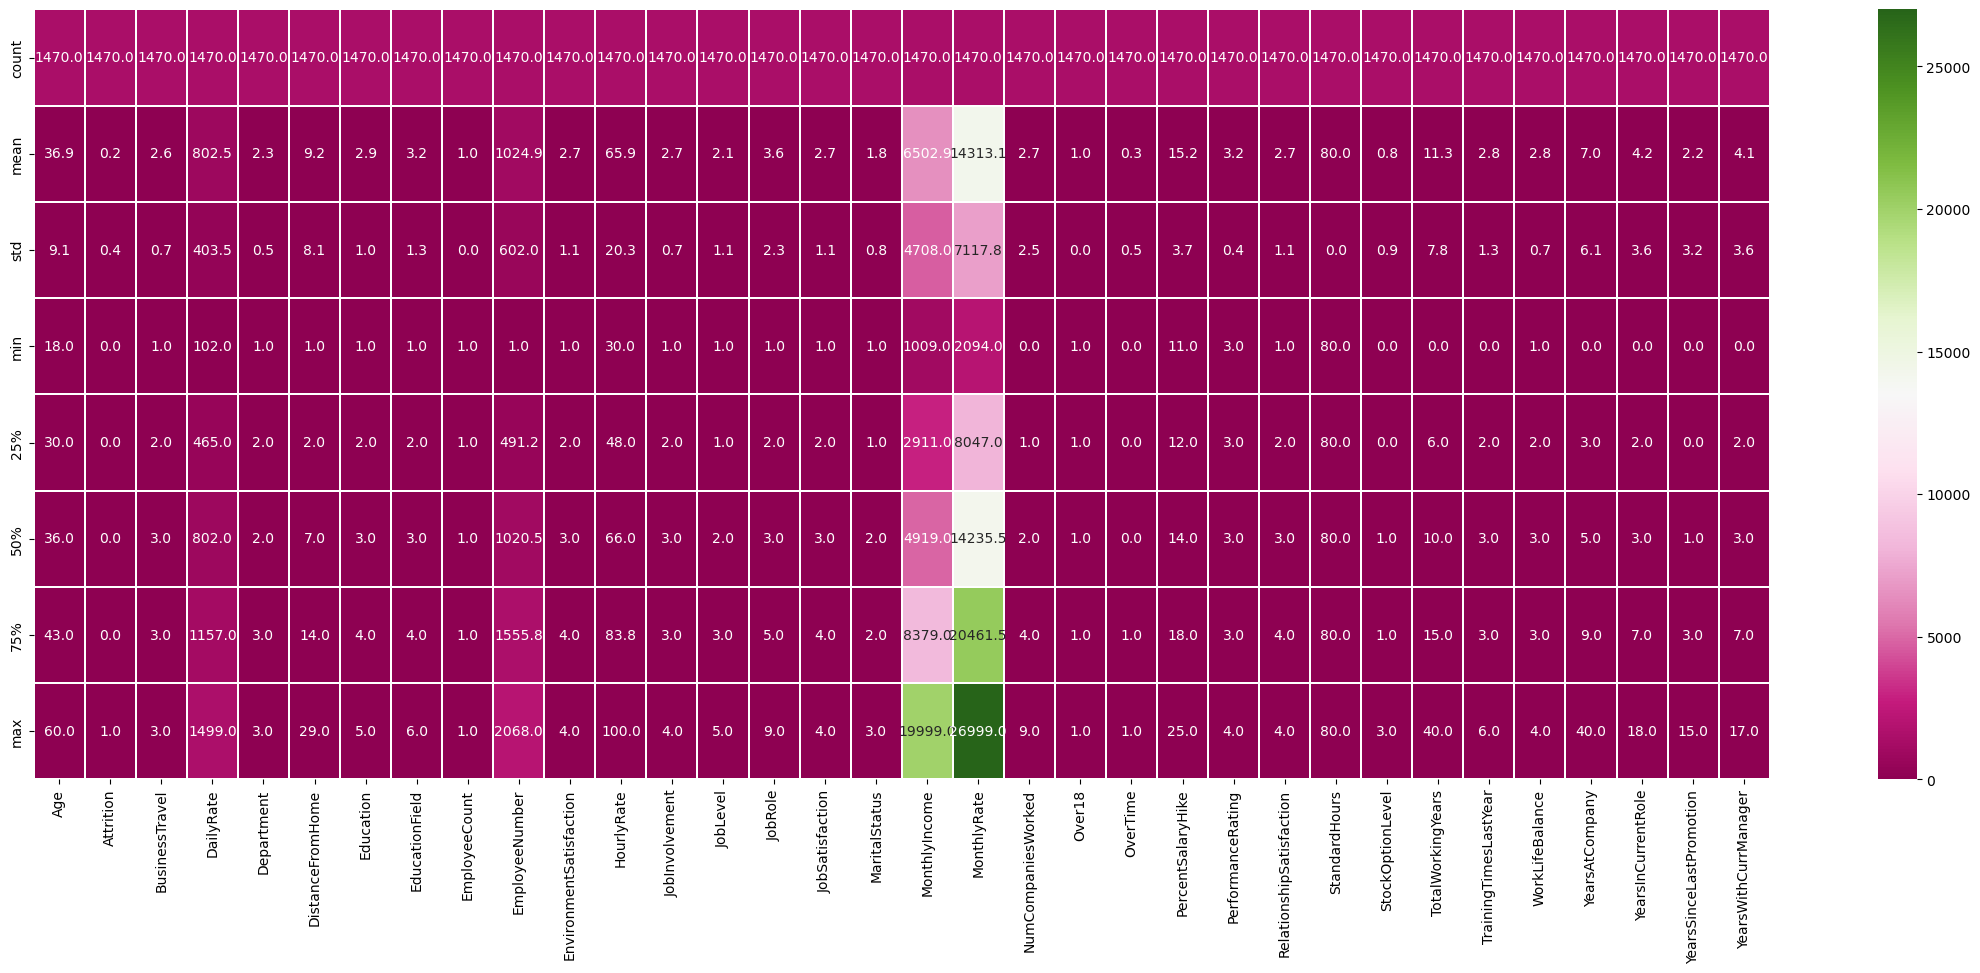

In [31]:
# Visualizing the statistics of the columns using heatmap.
plt.figure(figsize=(28,10))
sns.heatmap(df.describe(),linewidths = 0.1,fmt='0.1f',annot = True,cmap='PiYG')

In [32]:
df.describe().T.round(3)

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.924,9.135,18.0,30.00,36.0,43.00,60.0
Attrition,1470.0,0.161,0.368,0.0,0.00,0.0,0.00,1.0
BusinessTravel,1470.0,2.607,0.665,1.0,2.00,3.0,3.00,3.0
DailyRate,1470.0,802.486,403.509,102.0,465.00,802.0,1157.00,1499.0
Department,1470.0,2.261,0.528,1.0,2.00,2.0,3.00,3.0
DistanceFromHome,1470.0,9.193,8.107,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.913,1.024,1.0,2.00,3.0,4.00,5.0
EducationField,1470.0,3.248,1.331,1.0,2.00,3.0,4.00,6.0
EmployeeCount,1470.0,1.000,0.000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865,602.024,1.0,491.25,1020.5,1555.75,2068.0


Comment-

1.Minimum Empolyee Age is 18 and Maximum age of employee 60.

2.Average distance from home is 9.1 KM. It means that most of employee travel atleast 18 KM in day from home to office.

3.On Average performance Rating of employees is 3.163 with min value 3.0. This Means that performance of most of employee is 'Good'. This implies that Attrition of Employee with 'Outstanding' or 5 rating need to investigate.

4.50% of Employees has worked atleast 2 companies previously.

5.For Monthly Income,Monthly Rate by looking at 50% and max column we can say outliers exist in this feature.

6.By looking at Mean and Median we see that some of the features are skew in nature.

7.For ordinal features statstical terminology of mean, median, std deviation doesnot make sense.

8.StandardHours and EmployeeCount contain same value for all stastical parameter. It means they contain one unique value.

### Lets do some Statistical Analysis. Start with target Variable.

In [77]:
df['Attrition'].value_counts()

Attrition
0    1233
1     237
Name: count, dtype: int64

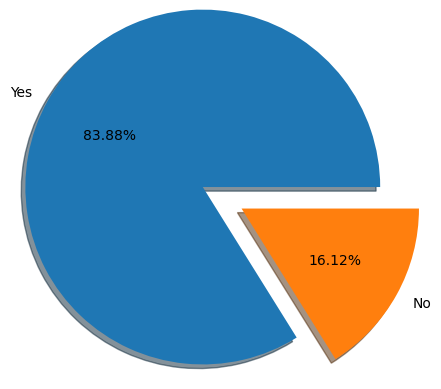

In [33]:
labels = 'Yes','No',
fig, ax = plt.subplots()
ax.pie(df['Attrition'].value_counts(),labels = labels,radius =1.2,autopct = '%2.2f%%',explode=[0.1,0.2], shadow=True,)
plt.show()

Comment -
83.88% (1237 employees) Employees did not leave the organization while 16.12% (237 employees) did leave the organization making our dataset to be considered imbalanced since more people stay in the organization than they actually leave.

lets try to gain some insight about individual features like distribution of different subcategories, different insight about Human Resource in company like education,job level, working domain.

Start with Enlisting Value counts & Sub-categories of different categorial features available

In [50]:
Category=['Attrition', 'BusinessTravel', 'Department', 'EducationField',
          'Gender', 'JobRole', 'MaritalStatus', 'OverTime' ]
for i in Category:
    print(df[i].value_counts())
    print("="*100)

Attrition
0    1233
1     237
Name: count, dtype: int64
BusinessTravel
3    1043
2     277
1     150
Name: count, dtype: int64
Department
2    961
3    446
1     63
Name: count, dtype: int64
EducationField
2    606
4    464
3    159
6    132
5     82
1     27
Name: count, dtype: int64
Gender
1    882
0    588
Name: count, dtype: int64
JobRole
1    326
2    292
3    259
4    145
5    131
6    102
7     83
8     80
9     52
Name: count, dtype: int64
MaritalStatus
1    673
2    470
3    327
Name: count, dtype: int64
OverTime
0    1054
1     416
Name: count, dtype: int64


### Enlisting Value counts & Sub-categories of different Ordinal features available

In [36]:
Ordinal=['Education','EnvironmentSatisfaction', 'JobInvolvement','JobSatisfaction',
          'RelationshipSatisfaction', 'PerformanceRating', 'WorkLifeBalance' ]
for i in Ordinal:
    print(df[i].value_counts())
    print("="*100)

Education
3    572
4    398
2    282
1    170
5     48
Name: count, dtype: int64
EnvironmentSatisfaction
3    453
4    446
2    287
1    284
Name: count, dtype: int64
JobInvolvement
3    868
2    375
4    144
1     83
Name: count, dtype: int64
JobSatisfaction
4    459
3    442
1    289
2    280
Name: count, dtype: int64
RelationshipSatisfaction
3    459
4    432
2    303
1    276
Name: count, dtype: int64
PerformanceRating
3    1244
4     226
Name: count, dtype: int64
WorkLifeBalance
3    893
2    344
4    153
1     80
Name: count, dtype: int64


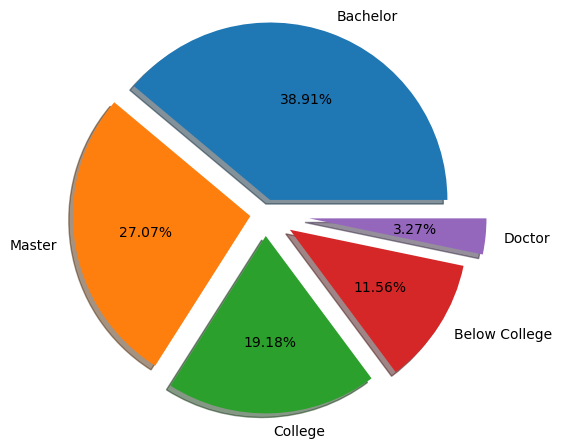

In [37]:
labels='Bachelor','Master','College','Below College','Doctor'
fig, ax = plt.subplots()
ax.pie(df['Education'].value_counts(),labels = labels,radius =1.2,autopct = '%3.2f%%',explode=[0.1,0.1,0.15,0.2,0.3], shadow=True,)
plt.show()

Comment:

1.More than 60 % employees educated at Masters & Bachelor. It interesting to find out in which department need this human resources.

2.30 % of Employees are highly educated which involves master and doctor degree.

3.39 % of Employees are graduate.

4.Almost 19% Employees are educated upto college & 12% are below college.

In [38]:
df['Department'].value_counts()

Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64

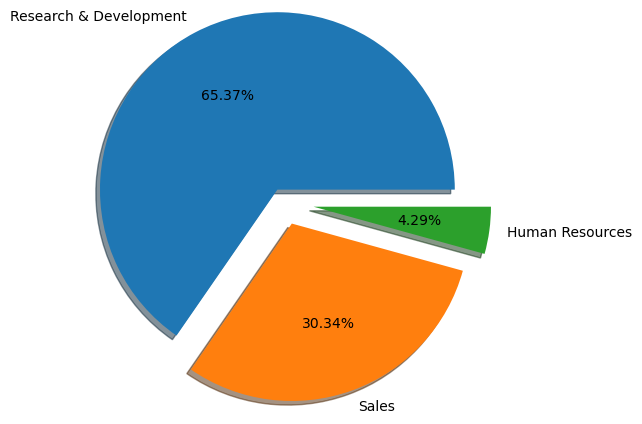

In [38]:
labels ='Research & Development','Sales','Human Resources'
fig,ax= plt.subplots()
ax.pie(df['Department'].value_counts(),labels=labels, radius=1.2,autopct= '%3.2f%%',explode=[0.1,0.15,0.2],shadow=True)
plt.show()

Comment-

1.65.37% of Employees belong to Research & Development Department. 

2.Out of Total 961 Employee no of employee educated at Bachelors,Masters, Doctor are 379,255 and 30 respectively.

3.Only 63 Employee work in HR department.

In [45]:
df['EducationField'].value_counts()

EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: count, dtype: int64

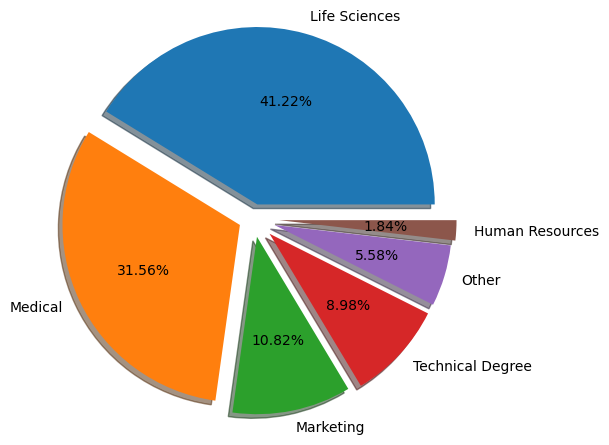

In [40]:
labels ='Life Sciences','Medical','Marketing','Technical Degree','Other','Human Resources'
fig,ax= plt.subplots()
ax.pie(df['EducationField'].value_counts(),labels=labels, radius=1.2,autopct= '%3.2f%%',explode=[0.1,0.1,0.125,0.15,0.15,0.175],shadow=True)
plt.show()

In [48]:
# Let check distribution of education Vs education Field
pd.crosstab([df.Education],[df.EducationField], margins=True)

EducationField,Human Resources,Life Sciences,Marketing,Medical,Other,Technical Degree,All
Education,,,,,,,
1,2,67,14,63,5,19,170
2,2,116,24,99,19,22,282
3,16,233,59,183,24,57,572
4,5,173,52,104,33,31,398
5,2,17,10,15,1,3,48
All,27,606,159,464,82,132,1470


In [49]:
# Let check distribution of department Vs education Field
pd.crosstab([df.Department],[df.EducationField], margins=True)

EducationField,Human Resources,Life Sciences,Marketing,Medical,Other,Technical Degree,All
Department,,,,,,,
Human Resources,27,16,0,13,3,4,63
Research & Development,0,440,0,363,64,94,961
Sales,0,150,159,88,15,34,446
All,27,606,159,464,82,132,1470


In [51]:
pd.crosstab([df.JobRole],[df.Department], margins=True)

Department,Human Resources,Research & Development,Sales,All
JobRole,,,,
Healthcare Representative,0,131,0,131
Human Resources,52,0,0,52
Laboratory Technician,0,259,0,259
Manager,11,54,37,102
Manufacturing Director,0,145,0,145
Research Director,0,80,0,80
Research Scientist,0,292,0,292
Sales Executive,0,0,326,326
Sales Representative,0,0,83,83


Comment:
    
1.There are 3 job role in HR Department, maximum of which are sales Executive with 446 Total Employees.

2.Human Resources department has 2 Job role i.e. HR & Manager.

3.There 6 different Job role in R&D department with total 961 employees and until now we know that all of them belong to thier respective domain background.

<Figure size 1200x1000 with 0 Axes>

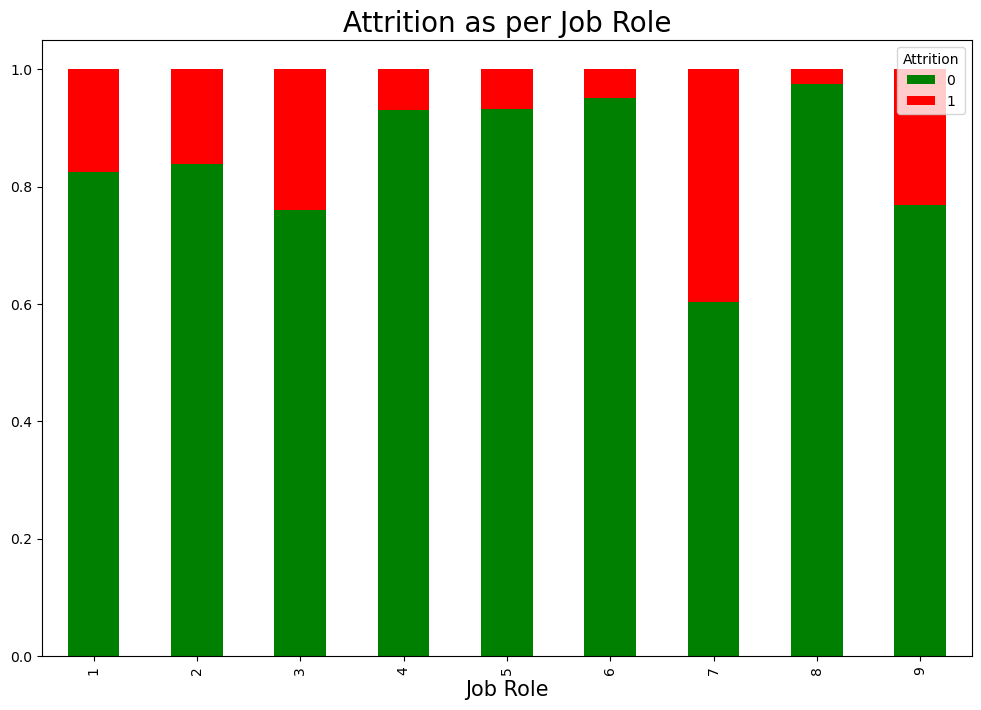

In [41]:
plt.figure(figsize=(12,10))
data=pd.crosstab(df['JobRole'], df['Attrition'])
data.div(data.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, 
                    color=['green', 'red'],figsize=(12,8))
plt.title('Attrition as per Job Role', fontsize=20)
plt.xlabel('Job Role',fontsize=15)
plt.show()

We all can definitely see Red Signal for different Managers & HR of Respective Job Role in above barplot 

## Age Vs Attrition

<Axes: xlabel='Age', ylabel='count'>

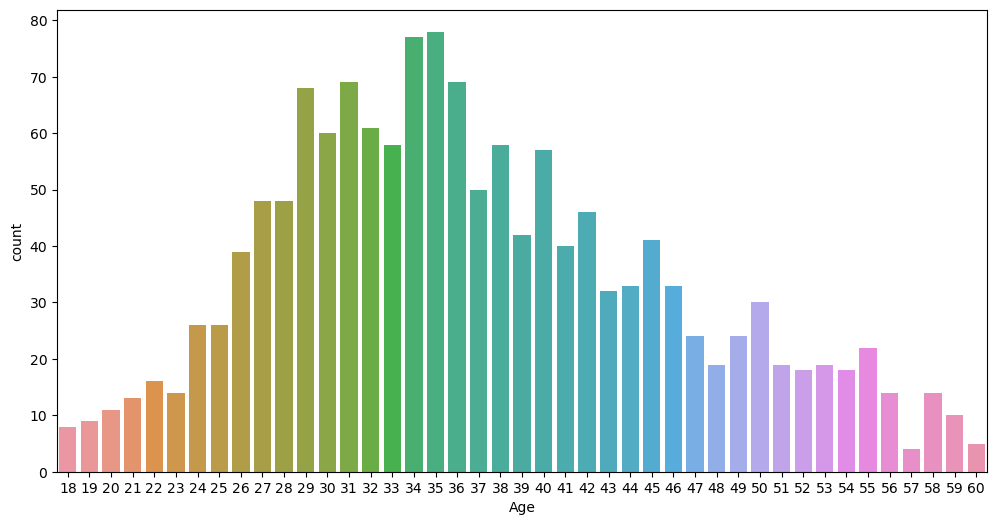

In [42]:
plt.subplots(figsize=(12,6))
sns.countplot(x='Age', data=df)

<Axes: xlabel='Age', ylabel='count'>

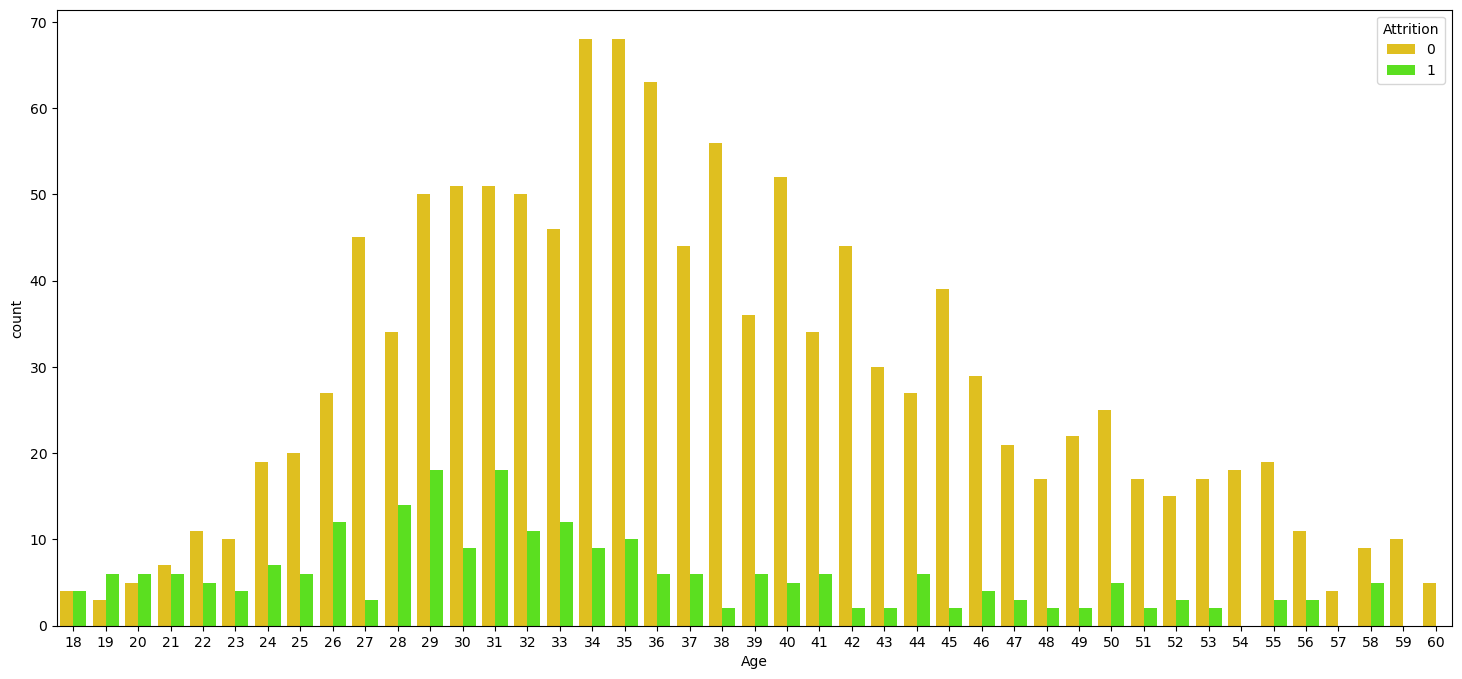

In [43]:
sns.set_palette('hsv')
plt.subplots(figsize=(18,8))
sns.countplot(x='Age', hue='Attrition', data=df)

Comment:

    1.The Attrition rate is minimum between the Age years of 34 and 35.

    2.The Attrition rate is maximum between the Age years of 29 and 31.

In [44]:
# Droping unnecessary columns
df.drop(["EmployeeCount", "EmployeeNumber", "Over18", "StandardHours"], axis=1, inplace=True)

In [45]:
df.shape

(1470, 31)

## Outliers Detection and Removal

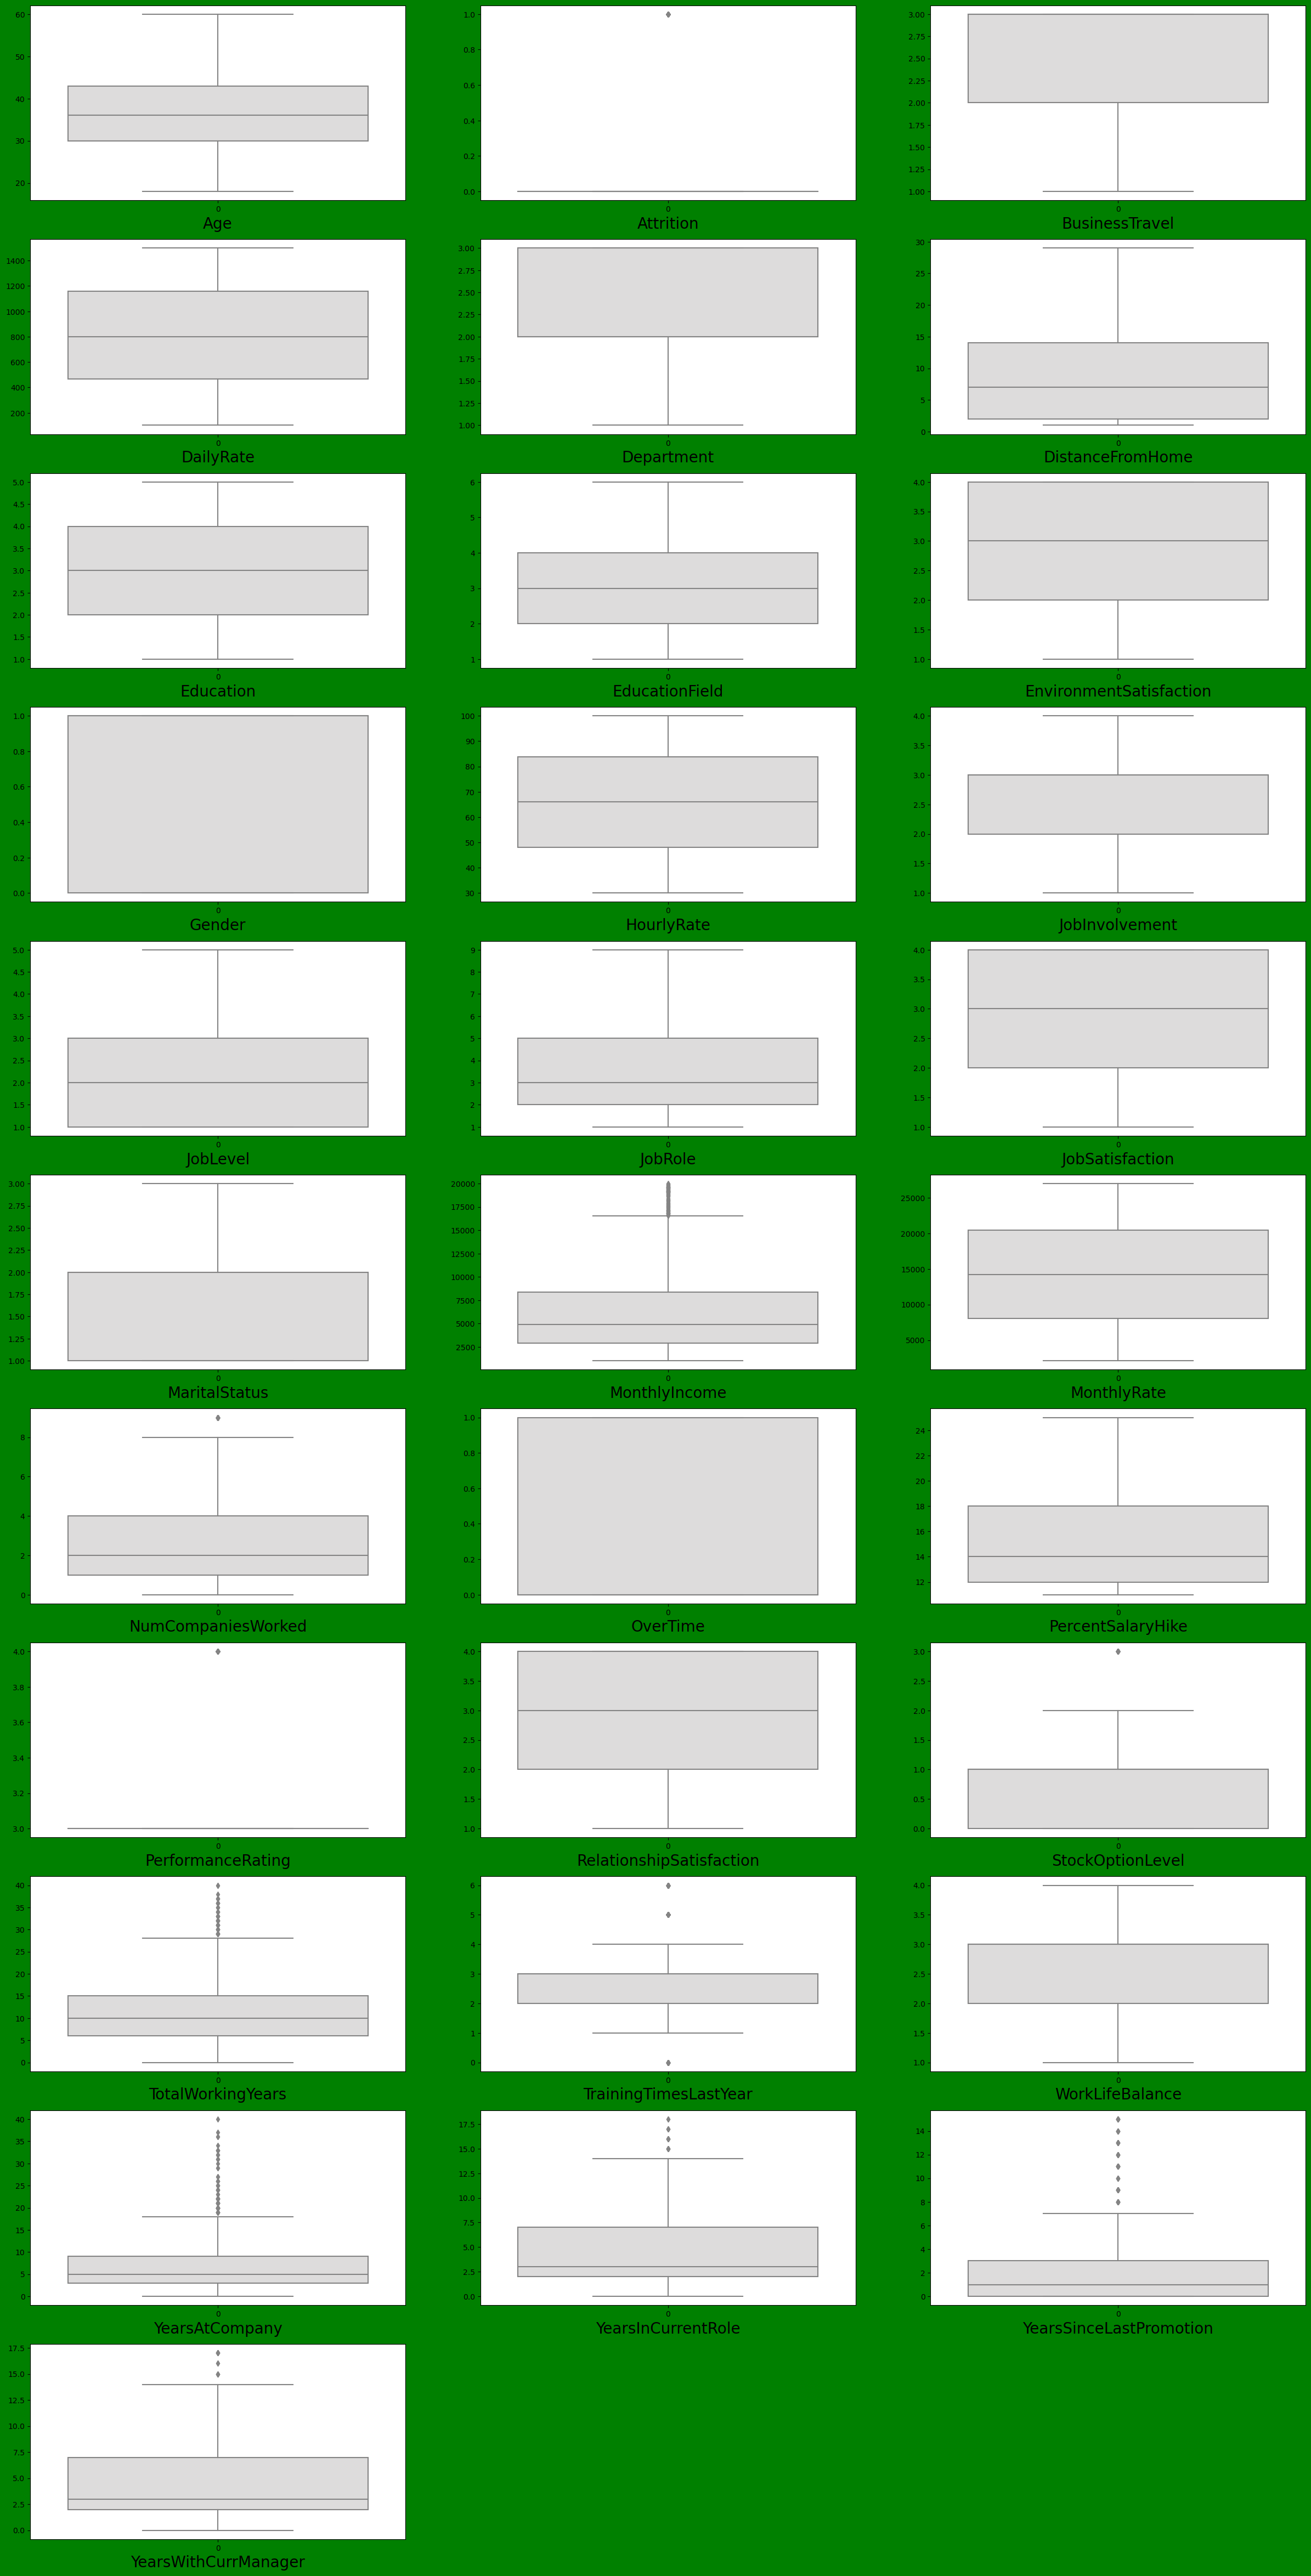

In [51]:
plt.figure(figsize=(30,60),facecolor='g')
index=1
for column in df:
    if index <=32:
        ax = plt.subplot(11,3,index)
        sns.boxplot(df[column], palette='coolwarm')
        plt.xlabel(column,fontsize=20)
    index+=1
plt.show()

Features containing outliers- 
"MonthlyIncome", "NumCompaniesWorked", "PerformanceRating", "StockOptionLevel", "TotalWorkingYears", "TrainingTimesLastYear", "YearsAtCompany", "YearsInCurrentRole", "YearsSinceLastPromotion", "YearsWithCurrManager", "Attrition".

In [52]:
from scipy.stats import zscore
z = np.abs(zscore(df))
threshold = 3
df1 = df[(z<3).all(axis = 1)]

print ("Shape of the dataframe before removing outliers: ", df.shape)
print ("Shape of the dataframe after removing outliers: ", df1.shape)
print ("Percentage of data loss post outlier removal: ", (df.shape[0]-df1.shape[0])/df.shape[0]*100)

df=df1.copy() # reassigning the changed dataframe name to our original dataframe name

Shape of the dataframe before removing outliers:  (1470, 31)
Shape of the dataframe after removing outliers:  (1387, 31)
Percentage of data loss post outlier removal:  5.646258503401361


### Data Loss


In [53]:
print("\033[1m"+'Percentage Data Loss :'+"\033[0m",((1470-1387)/1470)*100,'%')

Percentage Data Loss : 5.646258503401361 %


## Feature selection and Engineering

1. Skewness of features

In [54]:
df.skew()

Age                         0.472280
Attrition                   1.805983
BusinessTravel             -1.426774
DailyRate                  -0.017078
Department                  0.183919
DistanceFromHome            0.954752
Education                  -0.289024
EducationField              0.544868
EnvironmentSatisfaction    -0.325285
Gender                     -0.417296
HourlyRate                 -0.030481
JobInvolvement             -0.501401
JobLevel                    1.126075
JobRole                     0.869228
JobSatisfaction            -0.345612
MaritalStatus               0.450413
MonthlyIncome               1.544770
MonthlyRate                 0.030596
NumCompaniesWorked          1.037715
OverTime                    0.954751
PercentSalaryHike           0.800592
PerformanceRating           1.931566
RelationshipSatisfaction   -0.295686
StockOptionLevel            0.962332
TotalWorkingYears           1.034487
TrainingTimesLastYear       0.577614
WorkLifeBalance            -0.557100
Y

In [55]:
# Splitting data in target and dependent feature
X = df.drop(['Attrition'], axis =1)
Y = df['Attrition']

## Transforming skew data using power transform

In [56]:
from sklearn.preprocessing import power_transform
df = power_transform(X)
df = pd.DataFrame(df, columns=X.columns)
df.skew()

Age                        -0.004079
BusinessTravel             -0.946421
DailyRate                  -0.199742
Department                  0.004925
DistanceFromHome           -0.008149
Education                  -0.103747
EducationField              0.023481
EnvironmentSatisfaction    -0.205472
Gender                     -0.417296
HourlyRate                 -0.105678
JobInvolvement             -0.018801
JobLevel                    0.110769
JobRole                     0.038327
JobSatisfaction            -0.217730
MaritalStatus               0.118905
MonthlyIncome               0.027700
MonthlyRate                -0.176560
NumCompaniesWorked          0.016175
OverTime                    0.954751
PercentSalaryHike           0.112128
PerformanceRating           0.000000
RelationshipSatisfaction   -0.191406
StockOptionLevel            0.089929
TotalWorkingYears          -0.009666
TrainingTimesLastYear       0.057949
WorkLifeBalance            -0.011133
YearsAtCompany             -0.025230
Y

Comment :

1.For Numeric features skewness is transform within permissible limit.

2.For ordinal features & categorical features skew parameter irrevalent.

2. Corrleation

In [57]:
df.corr()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.019695,0.019864,-0.036324,-0.025855,0.215520,-0.037778,0.013967,-0.037163,0.026203,...,-0.002365,0.037296,0.089449,0.652405,-0.014951,-0.016180,0.207538,0.145404,0.114162,0.142446
BusinessTravel,0.019695,1.000000,-0.001676,-0.003557,-0.006473,-0.006131,0.034664,0.004409,-0.010451,0.026370,...,-0.021193,-0.036467,-0.005619,0.026906,0.005797,-0.018105,-0.024154,-0.035725,-0.033444,-0.032535
DailyRate,0.019864,-0.001676,1.000000,-0.003479,-0.006034,-0.017504,0.040701,0.034324,-0.003271,0.015156,...,0.000687,0.005771,0.049415,0.042750,0.005118,-0.046550,0.005391,0.022143,-0.035448,0.005908
Department,-0.036324,-0.003557,-0.003479,1.000000,0.037842,0.012752,0.077072,-0.013821,-0.030968,-0.000522,...,-0.038374,-0.037666,-0.000594,-0.006778,0.039966,0.017623,0.025406,0.057804,0.017690,0.024253
DistanceFromHome,-0.025855,-0.006473,-0.006034,0.037842,1.000000,0.002714,0.020920,-0.013409,0.010557,0.015607,...,0.013212,0.009379,0.027082,-0.012129,-0.015334,-0.030011,0.006570,0.013091,-0.003873,-0.002310
Education,0.215520,-0.006131,-0.017504,0.012752,0.002714,1.000000,-0.038432,-0.026095,-0.017807,0.011105,...,-0.023157,-0.004863,0.025621,0.150720,-0.023039,0.010164,0.037921,0.051072,0.016076,0.026651
EducationField,-0.037778,0.034664,0.040701,0.077072,0.020920,-0.038432,1.000000,0.042681,0.005427,-0.005135,...,-0.001529,-0.017358,-0.012898,-0.001869,0.054338,0.034997,0.004417,0.003968,0.022922,0.027930
EnvironmentSatisfaction,0.013967,0.004409,0.034324,-0.013821,-0.013409,-0.026095,0.042681,1.000000,-0.014940,-0.042512,...,-0.024853,0.016892,0.024345,-0.013356,-0.018350,0.030422,0.012338,0.029218,0.038031,0.006417
Gender,-0.037163,-0.010451,-0.003271,-0.030968,0.010557,-0.017807,0.005427,-0.014940,1.000000,0.005618,...,-0.010757,0.041439,0.024390,-0.049776,-0.039213,0.002726,-0.046018,-0.028101,-0.016131,-0.027972
HourlyRate,0.026203,0.026370,0.015156,-0.000522,0.015607,0.011105,-0.005135,-0.042512,0.005618,1.000000,...,-0.006571,0.005207,0.041329,-0.012902,-0.018396,-0.013811,-0.032827,-0.035899,-0.062271,-0.022931


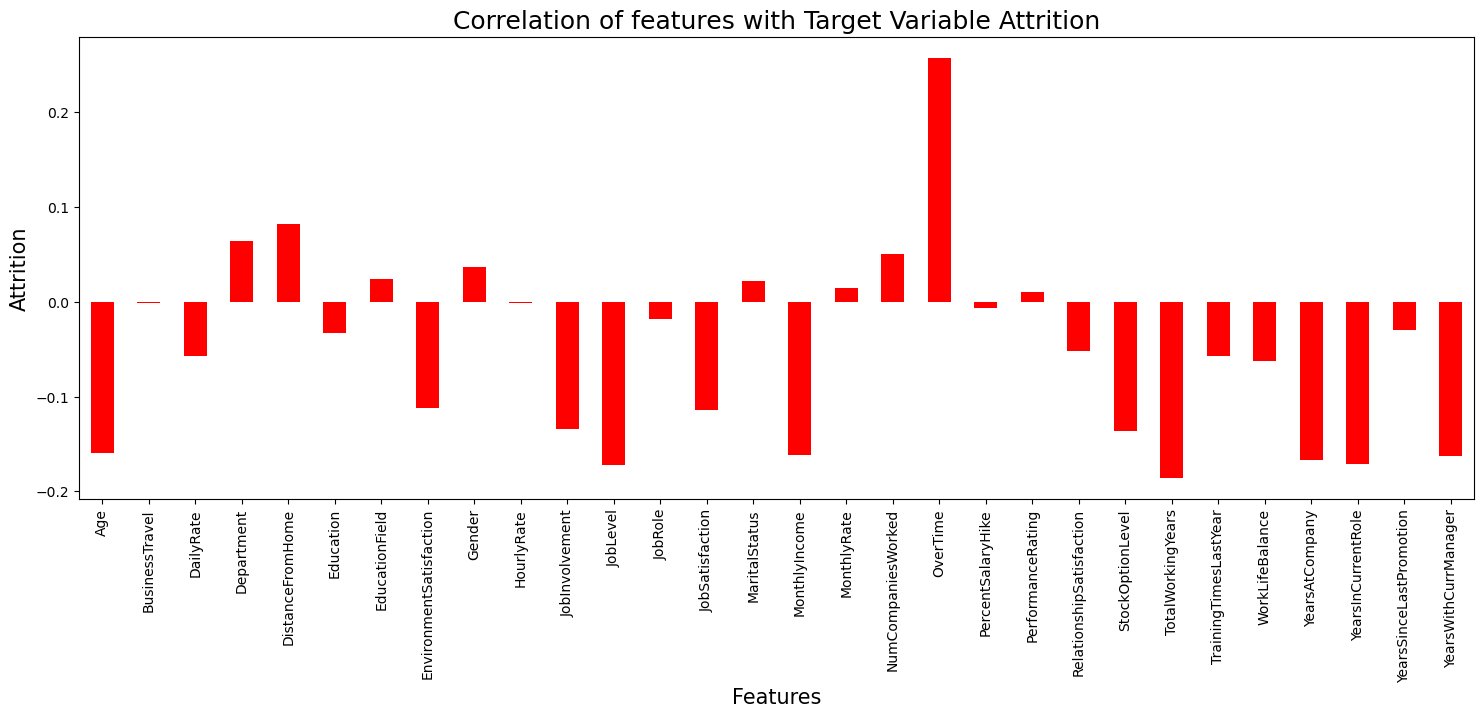

In [58]:
plt.figure(figsize = (18,6))
df1.corr()['Attrition'].drop(['Attrition']).plot(kind='bar',color = 'r')
plt.xlabel('Features',fontsize=15)
plt.ylabel('Attrition',fontsize=15)
plt.title('Correlation of features with Target Variable Attrition',fontsize = 18)
plt.show()

Comment:
    
1.Age, JobLevel, MonthlyIncome is highly positively correlated with TotalWorkingYears.

2.JobLevel is highly positively correlated with the MonthlyIncome.

3.PercentSalaryHike is highly positively correlated with the column PerformanceRating.

3. Checking Multicollinearity between features using variance_inflation_factor

In [59]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif= pd.DataFrame()
vif['VIF']= [variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
vif['Features']= df.columns
vif

,VIF,Features
0,1.933196,Age
1,1.017328,BusinessTravel
2,1.022751,DailyRate
3,1.648581,Department
4,1.018022,DistanceFromHome
5,1.070181,Education
6,1.029343,EducationField
7,1.024462,EnvironmentSatisfaction
8,1.021701,Gender
9,1.021422,HourlyRate


We can see that multicollinerity is within permissible limit of 10.

## Balancing using SMOTE
As data is Imbalanced in nature we will need to balance target variable.

In [61]:
from imblearn.over_sampling import SMOTE

In [62]:
# Oversampleing using SMOTE Techniques
oversample = SMOTE()
X, Y = oversample.fit_resample(X, Y)

In [63]:
Y.value_counts()

Attrition
1    1158
0    1158
Name: count, dtype: int64

## Standard Scaling

In [64]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scale = scaler.fit_transform(X)

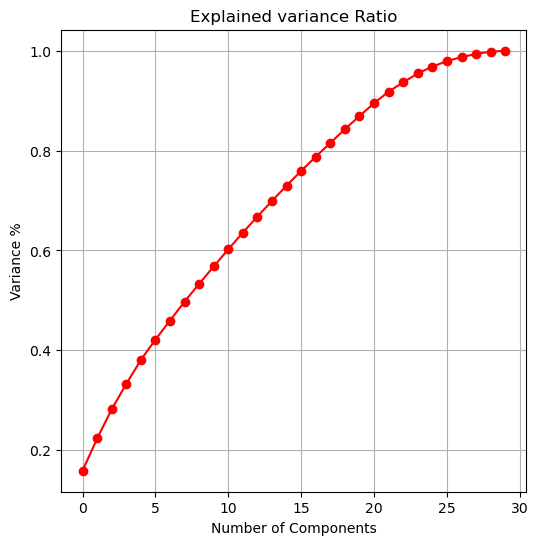

In [68]:
from sklearn.decomposition import PCA
pca = PCA()
#plot the graph to find the principal components
x_pca = pca.fit_transform(X_scale)
plt.figure(figsize=(6,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.xlabel('Number of Components')
plt.ylabel('Variance %')
plt.title('Explained variance Ratio')
plt.grid()

AS per the graph, we can see that 21 principal components attribute for 90% of variation in the data. We shall pick the first 21 components for our prediction

In [69]:
pca_new = PCA(n_components=21)
x_new = pca_new.fit_transform(X_scale)

In [70]:
principle_x=pd.DataFrame(x_new,columns=np.arange(21))

## Machine Learning Model Building

In [77]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier

In [72]:
X_train, X_test, Y_train, Y_test = train_test_split(principle_x, Y, random_state=42, test_size=.33)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',Y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',Y_test.shape)

Training feature matrix size: (1551, 21)
Training target vector size: (1551,)
Test feature matrix size: (765, 21)
Test target vector size: (765,)


## Finding best Random state

In [73]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score
maxAccu=0
maxRS=0
for i in range(1,250):
    X_train,X_test,Y_train,Y_test = train_test_split(principle_x,Y,test_size = 0.33, random_state=i)
    log_reg=LogisticRegression()
    log_reg.fit(X_train,Y_train)
    y_pred=log_reg.predict(X_test)
    acc=accuracy_score(Y_test,y_pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best accuracy is', maxAccu ,'on Random_state', maxRS)

Best accuracy is 0.8444444444444444 on Random_state 95


In [74]:
X_train, X_test, Y_train, Y_test = train_test_split(principle_x, Y, random_state=242, test_size=.33)
log_reg=LogisticRegression()
log_reg.fit(X_train,Y_train)
y_pred=log_reg.predict(X_test)
print('\033[1m'+'Logistics Regression Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of Logistics Regression :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of Logistics Regression :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of Logistics Regression'+'\033[0m \n',classification_report(Y_test, y_pred))

Logistics Regression Evaluation


Accuracy Score of Logistics Regression : 0.8274509803921568


Confusion matrix of Logistics Regression : 
 [[307  61]
 [ 71 326]]


classification Report of Logistics Regression 
               precision    recall  f1-score   support

           0       0.81      0.83      0.82       368
           1       0.84      0.82      0.83       397

    accuracy                           0.83       765
   macro avg       0.83      0.83      0.83       765
weighted avg       0.83      0.83      0.83       765



## Finding Optimal value of n_neighbors for KNN

In [78]:
from sklearn import neighbors
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse_val = []  # to store rmse values for different k
for K in range(30):
    K = K + 1
    model = KNeighborsRegressor(n_neighbors=K)
    model.fit(X_train, Y_train)  # fit the model
    y_pred = model.predict(X_test)  # make prediction on test set
    error = sqrt(mean_squared_error(Y_test, y_pred))  # calculate rmse
    rmse_val.append(error)  # store rmse values
    print('RMSE value for k =', K, 'is:', error)

RMSE value for k = 1 is: 0.34866692910423897
RMSE value for k = 2 is: 0.3243898243933287
RMSE value for k = 3 is: 0.31241556593546993
RMSE value for k = 4 is: 0.3227486121839514
RMSE value for k = 5 is: 0.3215160167388366
RMSE value for k = 6 is: 0.32073128133897255
RMSE value for k = 7 is: 0.32482128965748625
RMSE value for k = 8 is: 0.32730454927155567
RMSE value for k = 9 is: 0.33185340802622987
RMSE value for k = 10 is: 0.33427318482268853
RMSE value for k = 11 is: 0.33720006488338594
RMSE value for k = 12 is: 0.3407934268257103
RMSE value for k = 13 is: 0.34117700402570544
RMSE value for k = 14 is: 0.34331785106333096
RMSE value for k = 15 is: 0.3439190595695759
RMSE value for k = 16 is: 0.34472714653121755
RMSE value for k = 17 is: 0.3461541457638947
RMSE value for k = 18 is: 0.34715358798789414
RMSE value for k = 19 is: 0.35066557085783145
RMSE value for k = 20 is: 0.3518717457969538
RMSE value for k = 21 is: 0.3518868348668871
RMSE value for k = 22 is: 0.3525072054246596
RMSE v

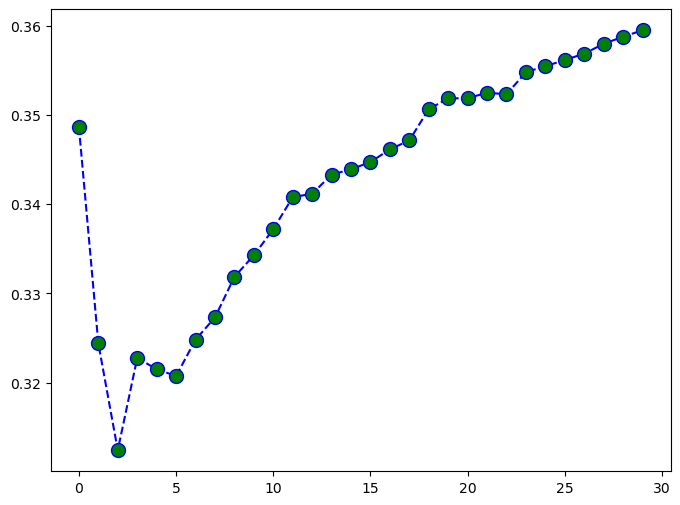

In [79]:
#plotting the rmse values against k values -
plt.figure(figsize = (8,6))
plt.plot(range(30), rmse_val, color='blue', linestyle='dashed', marker='o', markerfacecolor='green', markersize=10)

At k= 2, we get the minimum RMSE value which approximately 0.3243898243933287, and shoots up on further increasing the k value. We can safely say that k=2 will give us the best result in this case

## Applying other classification algorithm

In [81]:
model=[
        SVC(),
        GaussianNB(),
        DecisionTreeClassifier(),
        RandomForestClassifier(),
        AdaBoostClassifier(),
        GradientBoostingClassifier(),
        BaggingClassifier()]

for m in model:
    m.fit(X_train,Y_train)
    y_pred=m.predict(X_test)
    print('\033[1m'+'Classification ML Algorithm Evaluation Matrix',m,'is' +'\033[0m')
    print('\n')
    print('\033[1m'+'Accuracy Score :'+'\033[0m\n', accuracy_score(Y_test, y_pred))
    print('\n')
    print('\033[1m'+'Confusion matrix :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
    print('\n')
    print('\033[1m'+'Classification Report :'+'\033[0m \n',classification_report(Y_test, y_pred))
    print('\n')
    print('============================================================================================================')

Classification ML Algorithm Evaluation Matrix SVC() is


Accuracy Score :
 0.8862745098039215


Confusion matrix : 
 [[329  39]
 [ 48 349]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.87      0.89      0.88       368
           1       0.90      0.88      0.89       397

    accuracy                           0.89       765
   macro avg       0.89      0.89      0.89       765
weighted avg       0.89      0.89      0.89       765



Classification ML Algorithm Evaluation Matrix GaussianNB() is


Accuracy Score :
 0.8196078431372549


Confusion matrix : 
 [[299  69]
 [ 69 328]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.81      0.81      0.81       368
           1       0.83      0.83      0.83       397

    accuracy                           0.82       765
   macro avg       0.82      0.82      0.82       765
weighted avg       0.82      0.82      0.82       765




We can see that RandomForestClassifier() gives us good Accuracy and maximum f1 score. so we will continue further investigation with crossvalidation of above model

## CrossValidation 

In [82]:
from sklearn.model_selection import cross_val_score
model=[LogisticRegression(),
        SVC(),
        GaussianNB(),
        DecisionTreeClassifier(),
        RandomForestClassifier(),
        AdaBoostClassifier(),
        GradientBoostingClassifier(),
        BaggingClassifier()]

for m in model:
    score = cross_val_score(m, X, Y, cv =5)
    print('\n')
    print('\033[1m'+'Cross Validation Score', m, ':'+'\033[0m\n')
    print("Score :" ,score)
    print("Mean Score :",score.mean())
    print("Std deviation :",score.std())
    print('\n')
    print('============================================================================================================')



Cross Validation Score LogisticRegression() :

Score : [0.61853448 0.71490281 0.66090713 0.65658747 0.6825054 ]
Mean Score : 0.6666874581067997
Std deviation : 0.031714533490076774




Cross Validation Score SVC() :

Score : [0.59051724 0.62850972 0.587473   0.57883369 0.60259179]
Mean Score : 0.5975850897445445
Std deviation : 0.017234984459994575




Cross Validation Score GaussianNB() :

Score : [0.63793103 0.78185745 0.72354212 0.74946004 0.73434125]
Mean Score : 0.7254263796827288
Std deviation : 0.04795944886529743




Cross Validation Score DecisionTreeClassifier() :

Score : [0.67025862 0.8488121  0.8574514  0.80777538 0.825054  ]
Mean Score : 0.8018702986519699
Std deviation : 0.06809813367832422




Cross Validation Score RandomForestClassifier() :

Score : [0.73491379 0.96544276 0.95032397 0.94384449 0.94600432]
Mean Score : 0.9081058687718777
Std deviation : 0.0869240184438472




Cross Validation Score AdaBoostClassifier() :

Score : [0.64655172 0.89200864 0.88768898 0.8

On basis of maximum score in crossvalidation of Random Forest Classifier. we will apply Hyperparameter tuning on Random Forest model

## Hyper Parameter Tuning : GridSearchCV

In [83]:
from sklearn.model_selection import GridSearchCV

In [84]:
parameter = {  'bootstrap': [True], 'max_depth': [5, 10,20,40,50, None], 
              'max_features': ['auto', 'log2'], 
              'criterion':['gini','entropy'],
              'n_estimators': [5, 10, 15 ,25,50,100]}

In [85]:
GCV = GridSearchCV(RandomForestClassifier(),parameter,cv=5,n_jobs = -1,verbose=3)
GCV.fit(X_train,Y_train)


Fitting 5 folds for each of 144 candidates, totalling 720 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 20, 40, 50, None],
                         'max_features': ['auto', 'log2'],
                         'n_estimators': [5, 10, 15, 25, 50, 100]},
             verbose=3)

In [86]:
GCV.best_params_

{'bootstrap': True,
 'criterion': 'entropy',
 'max_depth': 20,
 'max_features': 'log2',
 'n_estimators': 100}

## Final Model

In [87]:
Final_mod = RandomForestClassifier(bootstrap=True,criterion='entropy',n_estimators= 25, max_depth=20 ,max_features='log2')
Final_mod.fit(X_train,Y_train)
y_pred=Final_mod.predict(X_test)
print('\033[1m'+'Accuracy Score :'+'\033[0m\n', accuracy_score(Y_test, y_pred))

Accuracy Score :
 0.8810457516339869


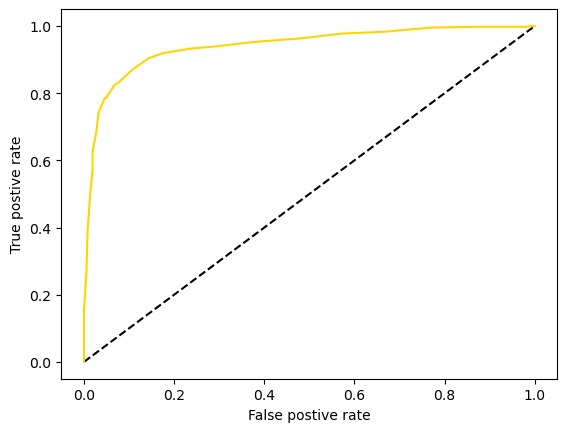

Auc Score :
 0.881420435877779


In [88]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

y_pred_prob = Final_mod.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(Y_test,y_pred_prob)
plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr, tpr, label='Random Forest Classifier')
plt.xlabel('False postive rate')
plt.ylabel('True postive rate')
plt.show()
auc_score = roc_auc_score(Y_test, Final_mod.predict(X_test))
print('\033[1m'+'Auc Score :'+'\033[0m\n',auc_score)

## Saving model

In [89]:
import joblib
joblib.dump(Final_mod,'HR_Analytics_Final.pkl')

['HR_Analytics_Final.pkl']